Before you can train a model on a dataset, it needs to be preprocessed into the expected model input format. Whether your data is text, images, or audio, they need to be converted and assembled into batches of tensors. Transformers provides a set of preprocessing classes to help prepare your data for the model. In this tutorial, you'll learn that for:

* Text, use a [Tokenizer] to convert text into a sequence of tokens, create a numerical representation of the tokens, and assemble them into tensors.
* Speech and audio, use a [Feature extractor] to extract sequential features from audio waveforms and convert them into tensors.
* Image inputs use a [ImageProcessor] to convert images into tensors.
* Multimodal inputs, use a [Processor] to combine a tokenizer and a feature extractor or image processor.


`AutoProcessor` **always** works and automatically chooses the correct class for the model you're using, whether you're using a tokenizer, image processor, feature extractor or processor.



# Natural Language Processing
The main tool to preprocessin the textual data is [tokenizer]. A tokenizer splits the text into tokens according to set of rules.The tokens are converted into numbers and then tensors,which becomes the model input. Any additional input required by the model are added by the tokenizer (* Like - <s> </s> and [CLS],[SEP] for start and end tokens for encoder and decoder models * Splits text into subwords tokens , convert tokens into IDs)

In [2]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')

# Tokenized text
encoded_tokens=tokenizer('Today is rainy day. And I love rain !')
print(encoded_tokens)

{'input_ids': [101, 3570, 1110, 21098, 1285, 119, 1262, 146, 1567, 4458, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


* input_ids- The token IDs that represents your input text. These are what model uses as embeddings
* attention_mask- Binary value [1-real token & 0- for padding] tells model which tokens need to attend
* token_type_ids- Used in models like BERT for distinguishing parts of multi-sequence inputs
* position_ids- Indicate the position of the each token in the sequence

In [3]:
tokenizer.decode(encoded_tokens['input_ids'])

'[CLS] Today is rainy day. And I love rain! [SEP]'

In [4]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


# PAD-
Sentence are not always the same length which can be issue because tensors and models require the uniform shape.Padding helps to uniform the text which have not same shaped length to other texts.
It adds the 0 to the texts to uniform shape

In [5]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences,padding=True)
print(encoded_inputs)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


The first and third sentences are now padded with `0`'s because they are shorter.

# Truncation-
Generally models takes limited tokens as input,Like BERT-512 and T5-1024.So if you pass tokens more than the model can handle,then it will show an error. Truncation clips the text into certain required tokens.

In [6]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences,padding=True,truncation=True)
print(encoded_inputs)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


# Build Tensors
* So After converting text into tokens,It converted into `input_ids` they are just intege representations of each tokens using the model's vocabulary.
*  When you do `return_tensors='pt'` you converts input_ids into tensors.

In [7]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_input)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


# Audio
For audio task you need `feature_extractor` to prepare your dataset for the model.
The feature extractor is designed to extract features from raw audio data and converts it into tensors.

In [10]:
from datasets import load_dataset,Audio
dataset=load_dataset('PolyAI/minds14',name='en-US',split='train')


The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [11]:
# Access the first element of the audio
dataset[0]['audio']

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

This returns three items:

* `array` is the speech signal loaded - and potentially resampled - as a 1D array.
* `path` points to the location of the audio file.
* `sampling_rate` refers to how many data points in the speech signal are measured per second.

In [12]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))
dataset[0]["audio"]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
         3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
 'sampling_rate': 16000}

Next, load a feature extractor to normalize and pad the input. When padding textual data, a `0` is added for shorter sequences. The same idea applies to audio data. The feature extractor adds a `0` - interpreted as silence - to `array`.


In [13]:
from transformers import AutoFeatureExtractor
feature_extractor=AutoFeatureExtractor.from_pretrained('facebook/wav2vec2-base')

audio_input=[dataset[0]['audio']['array']]
feature_extractor(audio_input,sampling_rate=16000)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


{'input_values': [array([ 3.0293269e-04,  2.7676334e-03,  2.8821775e-03, ...,
        5.1470479e-04,  2.1597825e-05, -1.2164921e-04], dtype=float32)]}

In [14]:
dataset[0]["audio"]["array"].shape

(173398,)

In [15]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )
    return inputs

In [16]:
processed_dataset = preprocess_function(dataset[:5])

In [17]:
processed_dataset["input_values"][0].shape

(100000,)

In [18]:
processed_dataset["input_values"][1].shape

(100000,)

# Computer Vision
For computer vision tasks, you'll need an [image processor] to prepare your dataset for the model.
Image preprocessing consists of several steps that convert images into the input expected by the model. These steps
include but are not limited to resizing, normalizing, color channel correction, and converting images to tensors.

<Tip>

Image preprocessing often follows some form of image augmentation. Both image preprocessing and image augmentation
transform image data, but they serve different purposes:

* Image augmentation alters images in a way that can help prevent overfitting and increase the robustness of the model. You can get creative in how you augment your data - adjust brightness and colors, crop, rotate, resize, zoom, etc. However, be mindful not to change the meaning of the images with your augmentations.
* Image preprocessing guarantees that the images match the model’s expected input format. When fine-tuning a computer vision model, images must be preprocessed exactly as when the model was initially trained.

You can use any library you like for image augmentation. For image preprocessing, use the `ImageProcessor` associated with the model.

</Tip>



In [19]:
from datasets import load_dataset

dataset = load_dataset("food101", split="train[:100]")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

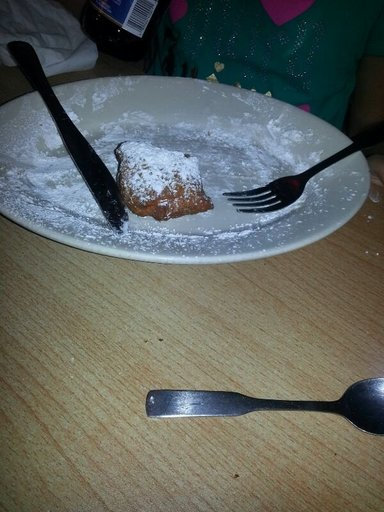

In [20]:
dataset[0]["image"]

In [21]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [22]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

In [23]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

In [24]:
dataset.set_transform(transforms)

In [25]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

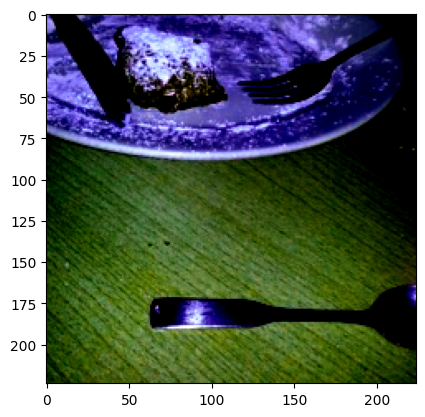

In [26]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))

# MultiModel
For tasks involving multimodal inputs, you'll need a processor to prepare your dataset for the model. A processor couples together two processing objects such as as tokenizer and feature extractor.

In [28]:
from datasets import load_dataset
lj_speech=load_dataset('lj_speech',split='train')

In [29]:
# Currently we are focusing on the Audio and Text
lj_speech = lj_speech.map(remove_columns=["file", "id", "normalized_text"])

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [30]:
lj_speech[0]["audio"]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/917ece08c95cf0c4115e45294e3cd0dee724a1165b7fc11798369308a465bd26/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
         7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
 'sampling_rate': 22050}

In [31]:
lj_speech[0]["text"]

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

In [32]:
# Sampling rate shoudl match to the dataset
lj_speech = lj_speech.cast_column("audio", Audio(sampling_rate=16_000))

In [33]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base-960h")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [34]:
def prepare_dataset(example):
    audio = example["audio"]

    example.update(processor(audio=audio["array"], text=example["text"], sampling_rate=16000))

    return example

In [35]:
prepare_dataset(lj_speech[0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/917ece08c95cf0c4115e45294e3cd0dee724a1165b7fc11798369308a465bd26/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'input_values': [array([-6.4672446e-03, -7.7975034e-03, -7.2209691e-03, ...,
          7.1398350e-03,  1.4186006e-03, -2.1961638e-05], dtype=float32)],
 'labels': [23,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,